1. Problem Definition and Understanding

problem statement: detect fraudulent transactions in credit card usage.

Context and Significance: Detecting fraud in real time can help reduce financial damage, enhance customer trust, and improve security in payment systems.

id: Unique identifier for each transaction

V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)

Amount: The transaction amount

Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

2. Data Collection and Integration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


3. Exploratory Data Analysis

Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [5]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()

0

0 missing values

0 duplicated rows

all cols are numeric



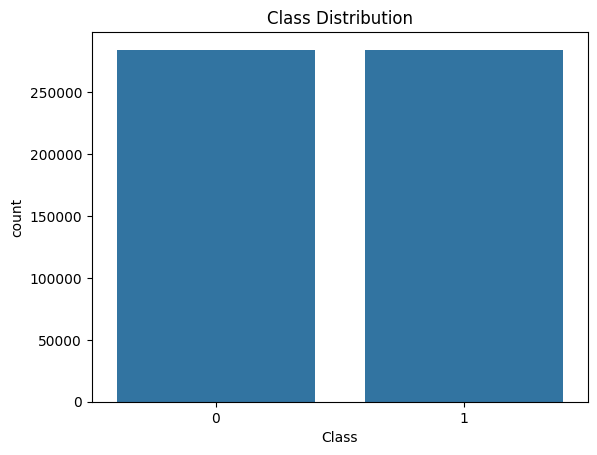

In [7]:
import seaborn as sns
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

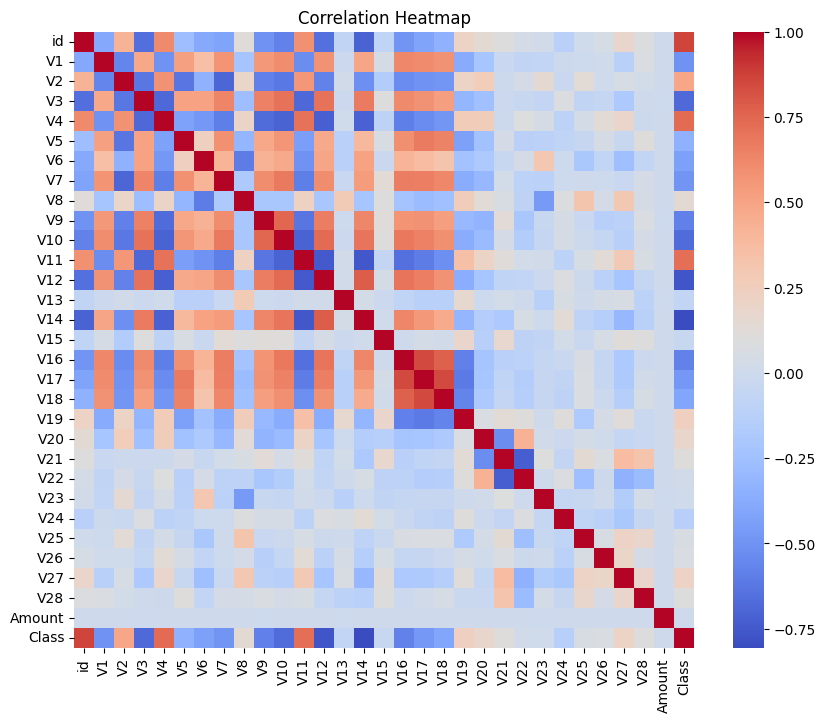

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

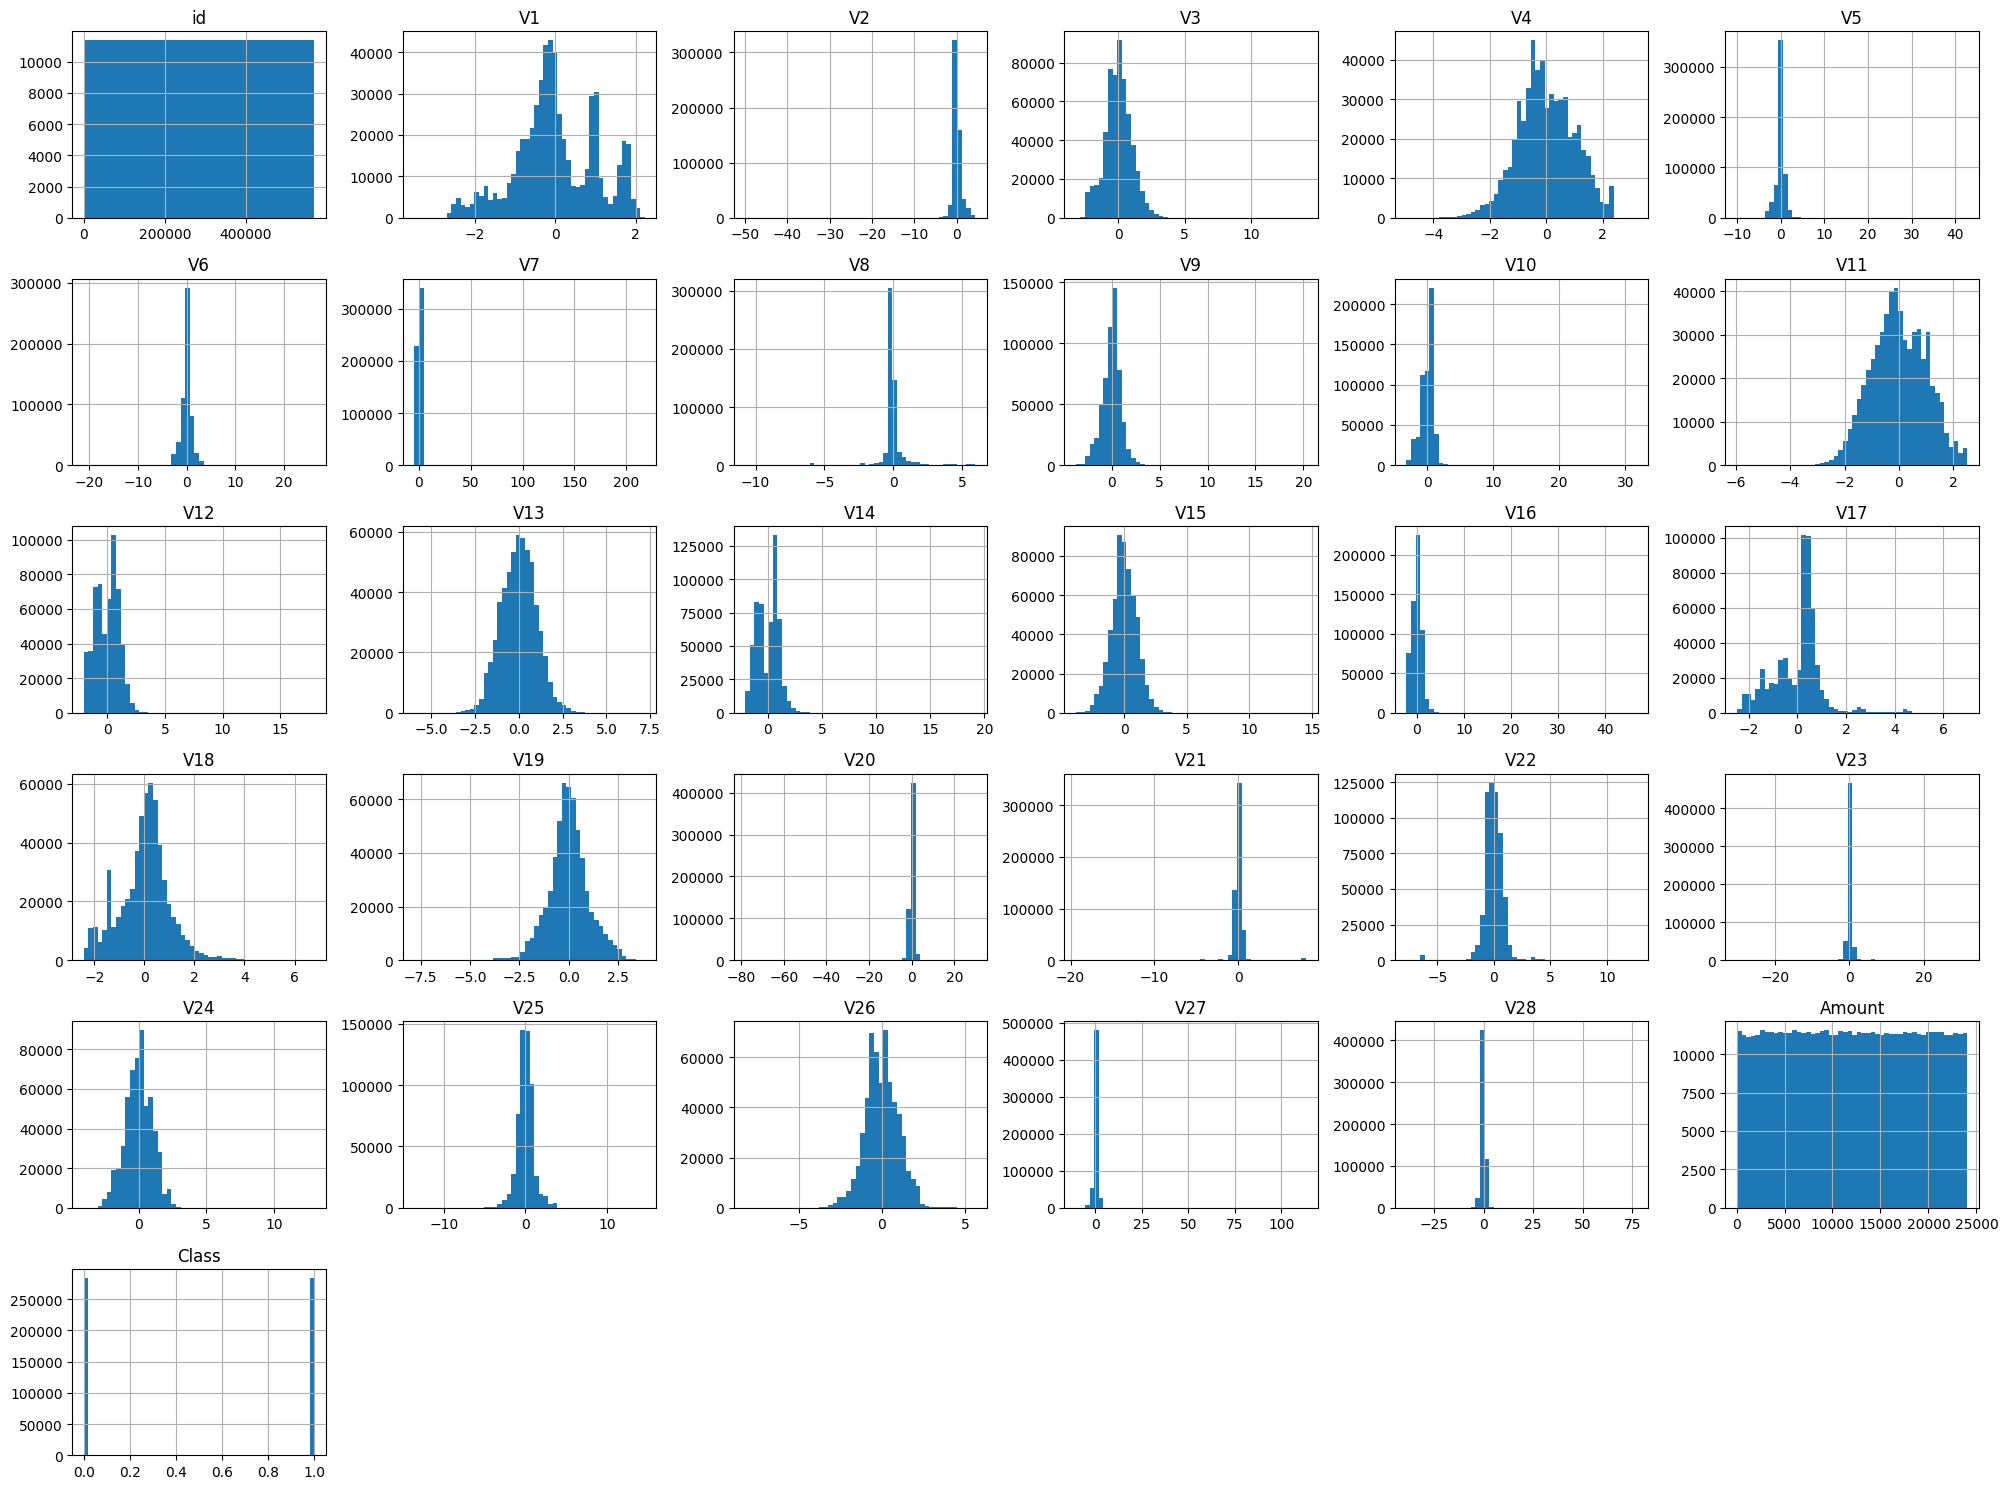

In [9]:
df.hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()

In [10]:
X = df.drop(['Class', 'id'], axis=1, errors='ignore')
y = df['Class']

In [11]:
z_scores = np.abs((X - X.mean()) / X.std())
X = X[(z_scores < 3).all(axis=1)]
y = y[X.index]

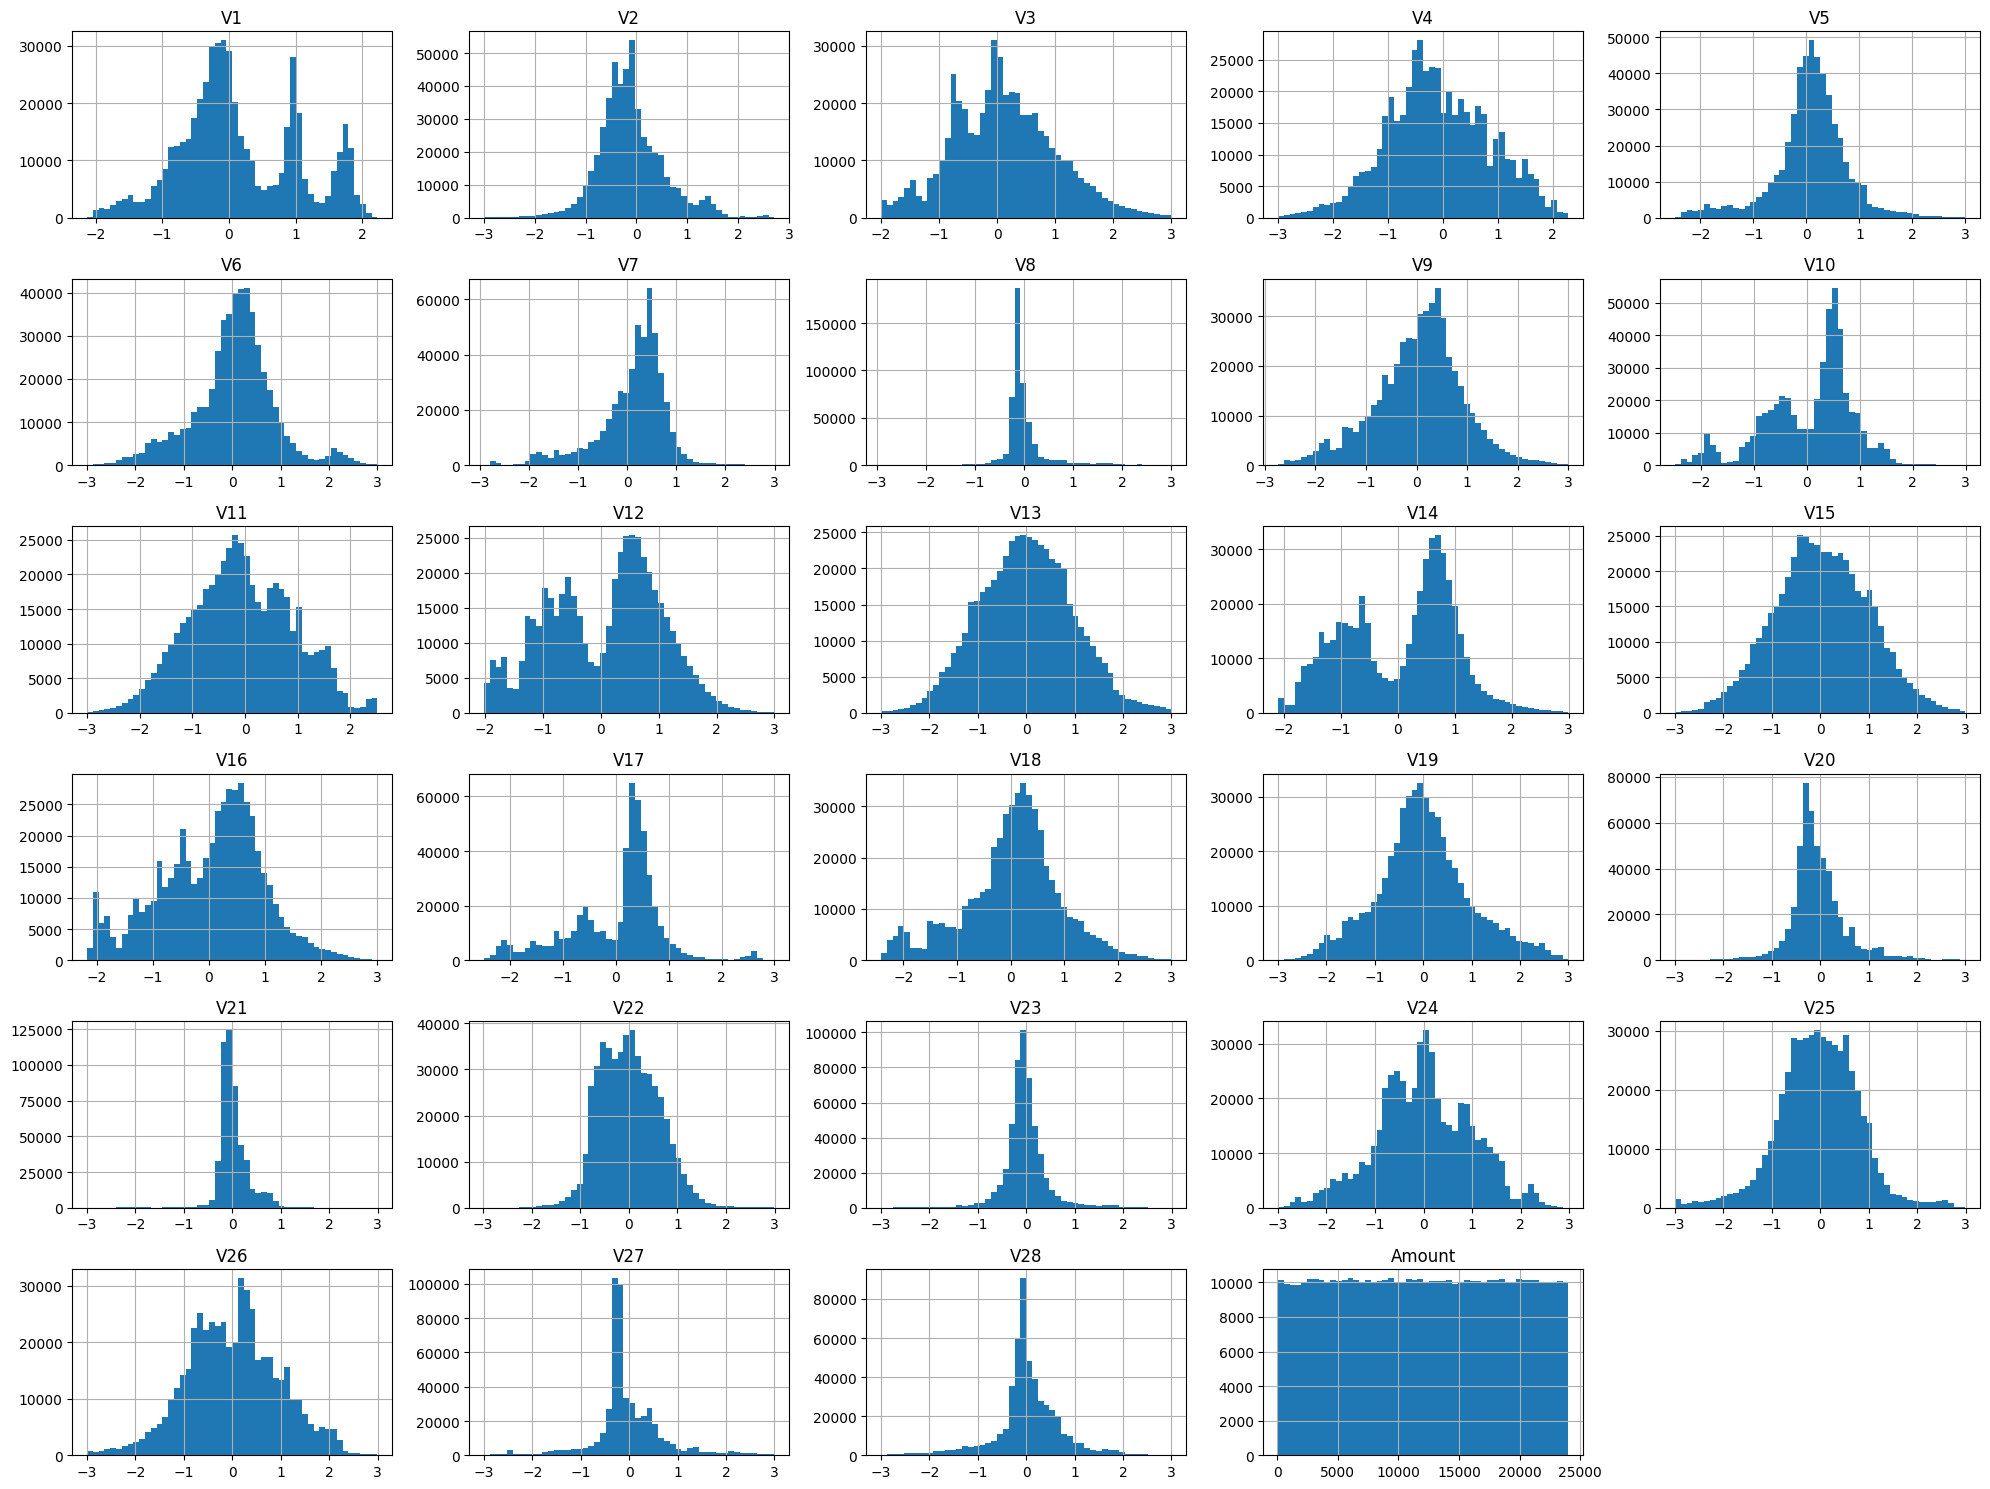

In [12]:
X.hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

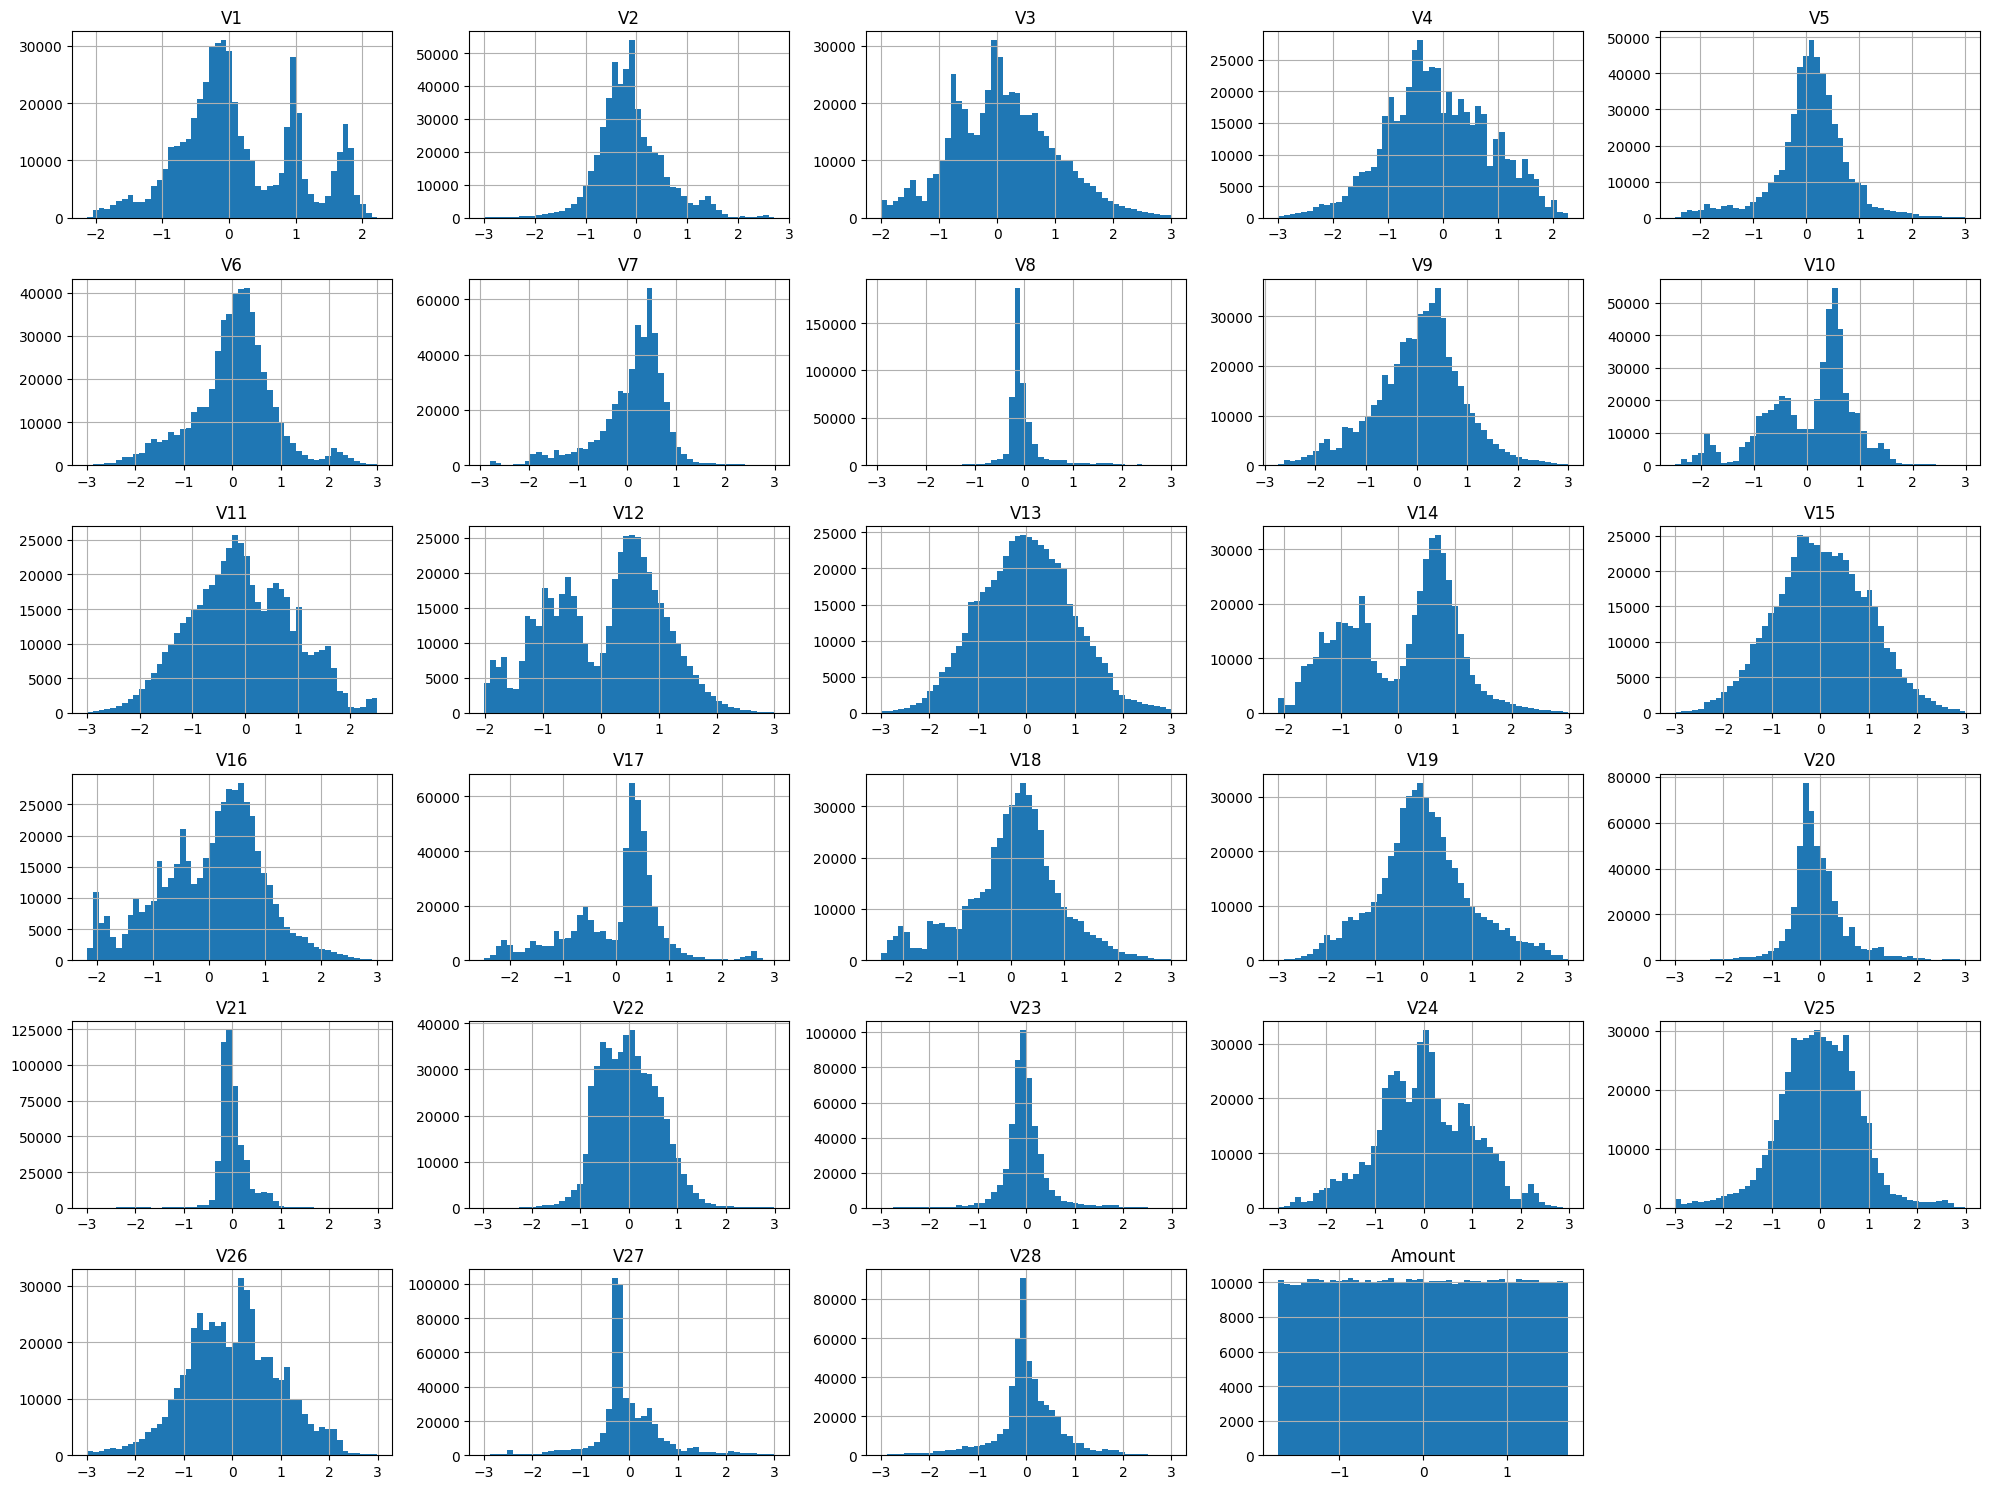

In [14]:
X.hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=15) 
X_rfe = rfe.fit_transform(X_train, y_train)

print('Selected Features:', X.columns[rfe.support_])

Selected Features: Index(['V1', 'V3', 'V4', 'V5', 'V7', 'V8', 'V10', 'V11', 'V12', 'V14', 'V17',
       'V18', 'V20', 'V22', 'V25'],
      dtype='object')


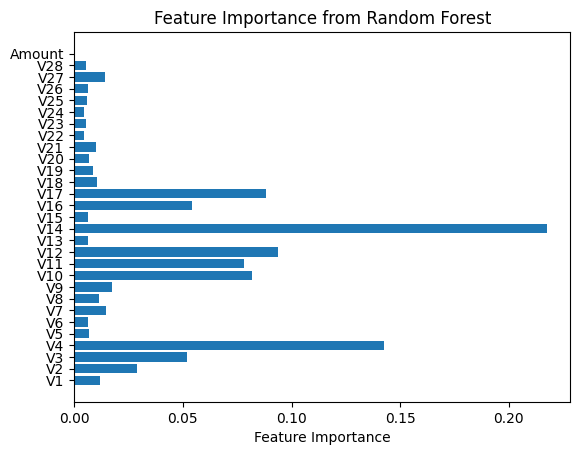

In [17]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()
    

In [18]:
df = df.sample(frac=0.5, random_state=42)
X = df.drop(['Class', 'id'], axis=1, errors='ignore')
y = df['Class']

selected_fet = ['V14', 'V12', 'V10', 'V4', 'V17']
X_selected = X[selected_fet]

In [19]:
X_selected.shape


(284315, 5)

In [20]:
y.shape

(284315,)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for model_name, model in models.items():
    scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
    print(f"{model_name} - Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Random Forest - Accuracy: 0.9959 ± 0.0003
Logistic Regression - Accuracy: 0.9542 ± 0.0006
K-Nearest Neighbors - Accuracy: 0.9910 ± 0.0002


50% data is dropped due to the massive size of the dataset
models perfromed roughly the same

Random forest, Knn performed nearly the same.

due to the computational power provided we will stick to the knn since it does nearly the same as the rf model but way less expenisve 

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)



param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)





Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [28]:
y_pred = best_knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


if len(set(y)) == 2:  
    y_pred_proba = best_knn.predict_proba(X_test)[:, 1]
    print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.9923324481648875

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     28411
           1       0.99      1.00      0.99     28452

    accuracy                           0.99     56863
   macro avg       0.99      0.99      0.99     56863
weighted avg       0.99      0.99      0.99     56863


Confusion Matrix:
[[27996   415]
 [   21 28431]]

ROC-AUC Score: 0.9962316349858511


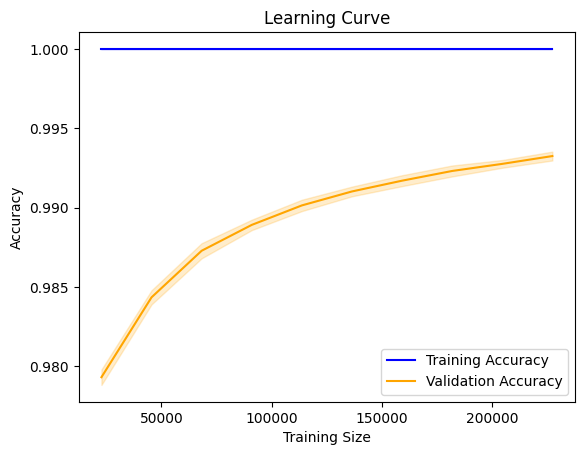

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(best_knn, X_selected, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure()
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


a difference of 0.001 is forgivable xd